<a href="https://colab.research.google.com/github/NimaZah/Ok-Cupid/blob/main/Ok_Cupid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Ok_Cupid_Datset.csv')

df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,10,11,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,70,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,68,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++","i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,71,20000,student,2012-06-28-14-22,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)",i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch

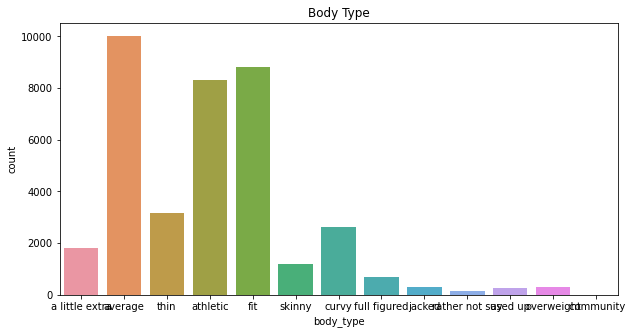

In [3]:
plt.figure(figsize=(10,5))
sns.countplot(x='body_type', data=df)
plt.title('Body Type')
plt.show()

In [4]:
df.shape
df.dtypes
df.isnull().sum()


age                 0
status              0
sex                 0
orientation         0
body_type        3524
                ...  
Unnamed: 149    41161
Unnamed: 150    41161
Unnamed: 151    41161
Unnamed: 152    41161
Unnamed: 153    41161
Length: 154, dtype: int64

In [5]:
df.columns


Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity',
       ...
       'Unnamed: 144', 'Unnamed: 145', 'Unnamed: 146', 'Unnamed: 147',
       'Unnamed: 148', 'Unnamed: 149', 'Unnamed: 150', 'Unnamed: 151',
       'Unnamed: 152', 'Unnamed: 153'],
      dtype='object', length=154)

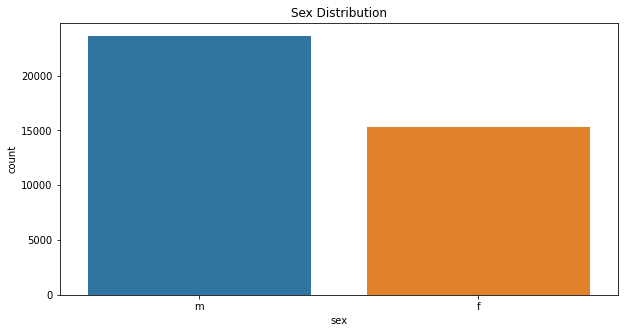

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [6]:
df['education'].value_counts()

graduated from college/university              16432
graduated from masters program                  6216
working on college/university                   3867
working on masters program                      1142
graduated from two-year college                 1030
graduated from high school                       947
graduated from ph.d program                      860
graduated from law school                        785
working on two-year college                      730
dropped out of college/university                691
working on ph.d program                          672
college/university                               531
graduated from space camp                        460
dropped out of space camp                        365
graduated from med school                        326
working on space camp                            311
working on law school                            192
two-year college                                 163
dropped out of two-year college               

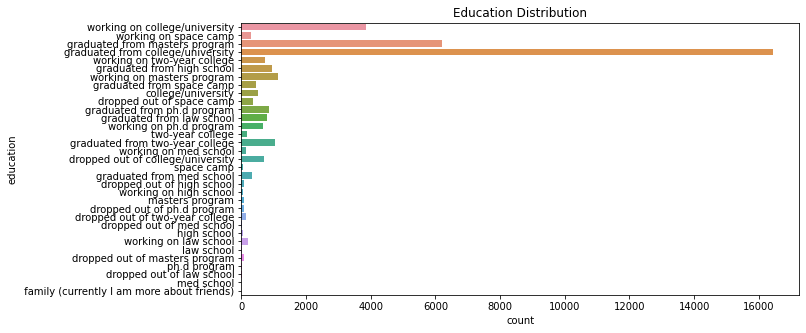

In [7]:
# Since the x-axis has too many categories, we reorient and plot the data in a horizontal bar plot:
plt.figure(figsize=(10,5))
sns.countplot(y='education', data=df)
plt.title('Education Distribution')
plt.show()

In [8]:
# We drop some of the items in education column: family (currently i'm more about friends, med school, dropped out of med school, dropped out of law school, space camp, dropped out of high school,dropped out of ph.d program, dropped out of masters program, dropped out of two-year college.
df = df[df.education != 'family']
df = df[df.education != 'med school']
df = df[df.education != 'dropped out of med school']
df = df[df.education != 'dropped out of law school']
df = df[df.education != 'space camp']
df = df[df.education != 'dropped out of high school']
df = df[df.education != 'dropped out of ph.d program']
df = df[df.education != 'dropped out of masters program']
df = df[df.education != 'dropped out of two-year college']
df = df[df.education != 'dropped out of college/university']
df = df[df.education != 'graduated from space camp']
df = df[df.education != 'dropped out of space camp']
df = df[df.education != 'working on space camp']
df = df[df.education != ' family (currently I am more about friends)']

df['education'].value_counts()

graduated from college/university    16432
graduated from masters program        6216
working on college/university         3867
working on masters program            1142
graduated from two-year college       1030
graduated from high school             947
graduated from ph.d program            860
graduated from law school              785
working on two-year college            730
working on ph.d program                672
college/university                     531
graduated from med school              326
working on law school                  192
two-year college                       163
working on med school                  148
masters program                         96
high school                             61
working on high school                  55
ph.d program                            16
law school                              12
Name: education, dtype: int64

In [9]:
# Creating 4 categories in education: highschool, undergraduate, masters, phd
df['education'] = df['education'].replace(['graduated from high school', 'working on high school'], 'highschool')
df['education'] = df['education'].replace(['graduated from two-year college', 'working on two-year college', 'graduated from college/university', 'graduated from law school', 'college/university', 'working on law school', 'working on med school', 'law school', 'working on college/university', 'graduated from med school', 'two-year college', 'high school'], 'undergraduate')
df['education'] = df['education'].replace(['graduated from masters program', 'working on masters program', 'masters program'], 'masters')
df['education'] = df['education'].replace(['graduated from ph.d program', 'working on ph.d program', 'ph.d program'], 'phd')
df['education'].value_counts()

undergraduate    24277
masters           7454
phd               1548
highschool        1002
Name: education, dtype: int64

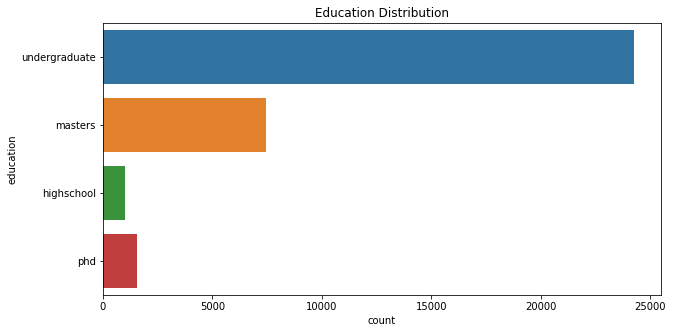

In [10]:
# We creat only three categories for education: drop out, high school and graduate.
plt.figure(figsize=(10,5))
sns.countplot(y='education', data=df)
plt.title('Education Distribution')
plt.show()

In [12]:
# there are some empty values in the column age. We need to remove them.
df['age'].replace('', np.nan, inplace=True)
df.dropna(subset=['age'], inplace=True)
df.shape

(38879, 154)

In [13]:
# ```TypeError: Neither the `x` nor `y` variable appears to be numeric.``` This error means that the data type of the column age is not numeric. We need to convert it to numeric.
df['age'] = pd.to_numeric(df['age'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


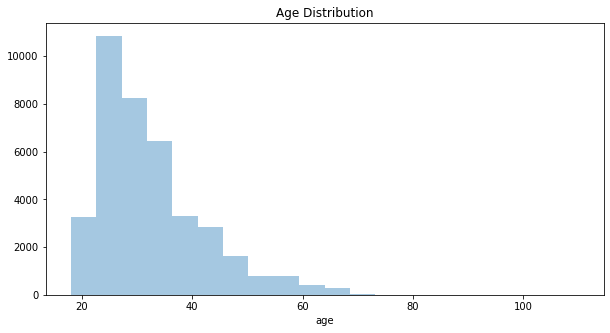

In [14]:
# 
plt.figure(figsize=(10,5))
sns.distplot(df['age'], kde=False, bins=20)
plt.title('Age Distribution')
plt.show()


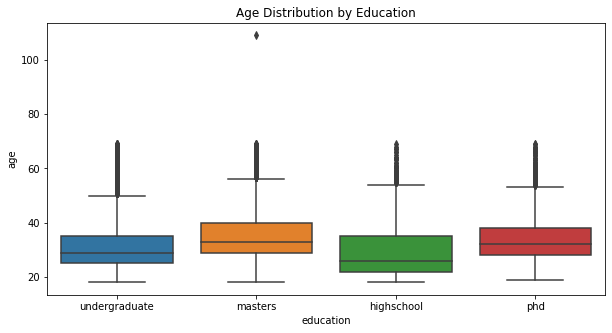

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x='education', y='age', data=df)
plt.title('Age Distribution by Education')
plt.show()

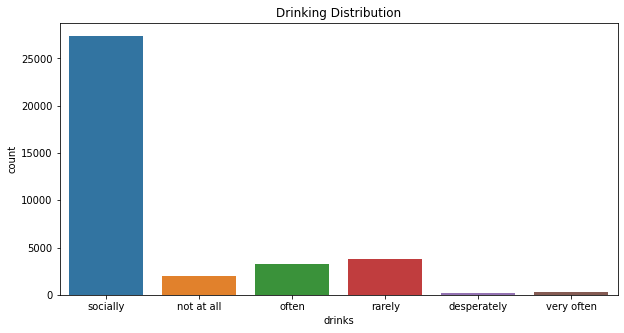

In [18]:
plt.figure(figsize=(10,5))
plt.xlim(0, 100)
sns.countplot(x='drinks', data=df)
plt.title('Drinking Distribution')
plt.show()